# Unit 5 - Financial Planning

In [131]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [132]:
# Load .env enviroment variables
load_dotenv("example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [133]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [134]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [135]:
# Fetch current BTC price
# YOUR CODE HERE!
ticker_btc = requests.get(btc_url)
#This attribute returns the raw bytes of the response content
btc_content = ticker_btc.content
#using .json for storing and exchanging data.
current_price_btc = ticker_btc.json()
        
# Fetch current ETH price
# YOUR CODE HERE!
ticker_eth = requests.get(eth_url)
#This attribute returns the raw bytes of the response content
eth_content = ticker_eth.content
#using .json for storing and exchanging data.
current_price_eth = ticker_eth.json()

# Compute current value of my crpto
# YOUR CODE HERE!
#{'data': {'1': {'id': 1,'name': 'Bitcoin','symbol': 'BTC','website_slug': 'bitcoin','rank': 1,'circulating_supply': 19430075,'total_supply': 19430075,'max_supply': 21000000,'quotes': {'USD': {'price': 30297.0,'volume_24h': 10761627030,'market_cap': 588620904160,'percentage_change_1h': -0.054080377588934,'percentage_change_24h': -2.96188536373617'percentage_change_7d': 0.283717198681226,'percent_change_1h': -0.054080377588934,'percent_change_24h': -2.96188536373617,'percent_change_7d': 0.283717198681226}},'last_updated': 1689439498}},'metadata': {'timestamp': 1689439498,'num_cryptocurrencies': 3119,'error': None}}

btc_price = current_price_btc["data"]["1"]['quotes']["USD"]["price"]

#{'data': {'1027': {'id': 1027,'name': 'Ethereum','symbol': 'ETH','website_slug': 'ethereum','rank': 2,'circulating_supply': 120201621,'total_supply': 120201621,'max_supply': 120201621,'quotes': {'USD': {'price': 1935.38, 'volume_24h': 8987949827,'market_cap': 232625241844,'percentage_change_1h': -0.0546726872812074,'percentage_change_24h': -2.90099577891599,'percentage_change_7d': 4.06472732363121,'percent_change_1h': -0.0546726872812074,'percent_change_24h': -2.90099577891599,'percent_change_7d': 4.06472732363121}},'last_updated': 1689439498}},'metadata': {'timestamp': 1689439498,'num_cryptocurrencies': 3119,'error': None}}

eth_price = current_price_eth["data"]["1027"]["quotes"]["USD"]["price"]

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36352.80
The current value of your 5.3 ETH is $10223.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [136]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [137]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [138]:
# Format current date as ISO format
start_date = pd.Timestamp("2023-07-13", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

agg_spy_df = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


In [139]:
agg_spy_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-07-13 04:00:00+00:00,98.180,98.44,98.115,98.41,7458509,31270,98.343983,AGG
2023-07-14 04:00:00+00:00,98.230,98.31,97.920,97.94,7208357,21903,98.096753,AGG
2023-07-13 04:00:00+00:00,447.900,450.38,447.450,449.56,72425241,449368,448.598241,SPY
2023-07-14 04:00:00+00:00,450.475,451.36,448.490,449.28,69730670,484025,449.818675,SPY


In [140]:
# Reorganize the DataFrame
AGG_df = agg_spy_df[agg_spy_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY_df = agg_spy_df[agg_spy_df['symbol']=='SPY'].drop('symbol', axis=1)

#AGG_df = agg_spy_df.drop(columns=['open','high', 'low','volume', 'trade_count', 'vwap'], axis=1)
#SPY_df = agg_spy_df.drop(columns=['open','high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
# Separate ticker data

# Concatenate the ticker DataFrames
agg_spy_portfolio = pd.concat([AGG_df, SPY_df], axis=1, keys=["AGG", "SPY"])
#Removing the time format from the data
agg_spy_portfolio.index = agg_spy_portfolio.index.date


# Preview DataFrame
agg_spy_portfolio

AGG                                                        \
             open   high     low  close   volume trade_count       vwap   
2023-07-13  98.18  98.44  98.115  98.41  7458509       31270  98.343983   
2023-07-14  98.23  98.31  97.920  97.94  7208357       21903  98.096753   

                SPY                                                            
               open    high     low   close    volume trade_count        vwap  
2023-07-13  447.900  450.38  447.45  449.56  72425241      449368  448.598241  
2023-07-14  450.475  451.36  448.49  449.28  69730670      484025  449.818675

In [141]:
#With a callable function that expects the Series or DataFrame. df.iloc[:, lambda df: [0, 2]]
last_close = lambda df: df['close'][-1]

In [142]:
# Pick AGG and SPY close prices

agg_close_price = last_close(AGG_df)
spy_close_price = last_close(SPY_df)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.94
Current SPY closing price: $449.28


In [143]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19588.00
The current value of your 50 SPY shares is $22464.00


### Savings Health Analysis

In [144]:
# Set monthly household income
#12,000 was provided by source information
monthly_income = 12000

# Consolidate financial assets data
#Combine the values previously calculated cell 5 and 96

crypto_assets = my_btc_value + my_eth_value
shares_assets = my_agg_value + my_spy_value

savings_data = [crypto_assets, shares_assets]

# Create savings DataFrame
#Creating a df with the consolidated financial data previosly calculated
savings_df = pd.DataFrame(data=[crypto_assets, shares_assets], index=['crypto_assets', 'shares_assets'], columns=['amount'])

# Display savings DataFrame
display(savings_df)

,amount
crypto_assets,46576.765
shares_assets,42052.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

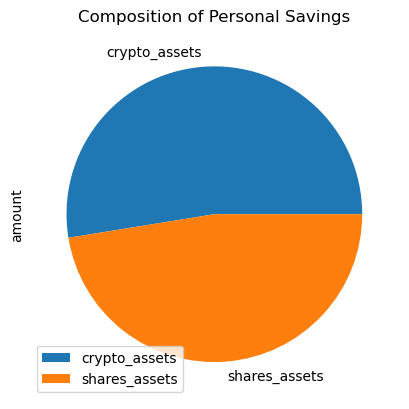

In [145]:
# Plot savings pie chart
savings_df.plot.pie(y="amount", title="Composition of Personal Savings")

In [146]:
# Set ideal emergency fund
#equal to three times the value of the member’s monthly_income of $12000.
emergency_fund_value = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_assets + shares_assets

# Validate saving health

#f the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.
if total_savings > emergency_fund_value:
    print('Congratulations member, you have enough money in this fund.')
    
#Else if the total portfolio value is equal to the emergency fund value, display a message 
elif total_savings == emergency_fund_value:
    print('Congratulations member, you have reached on reaching an important financial goal.')
    
#Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal.
else: 
    total_savings < emergency_fund_value
    print(f'Member is {emergency_fund_value - total_savings} dollars from reaching an important fianacial goal')



Congratulations member, you have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [190]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-14', tz='America/New_York').isoformat()

In [191]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
AGG2_df = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY2_df = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG2_df, SPY2_df], axis=1, keys=["AGG", "SPY"])
#Removing the time format from the data
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                  \
              open     high       low   close   volume trade_count   
2018-07-16  106.35  106.400  106.2434  106.39  2116689        8807   
2018-07-17  106.40  106.450  106.2900  106.35  2964110       10450   
2018-07-18  106.36  106.385  106.2700  106.32  1760878       14103   
2018-07-19  106.34  106.545  106.3100  106.48  2163268       10957   
2018-07-20  106.38  106.440  106.2000  106.27  3024605       12352   

                           SPY                                                 \
                  vwap    open     high     low   close    volume trade_count   
2018-07-16  106.343343  279.64  279.803  278.84  279.39  48722138      177350   
2018-07-17  106.371231  278.47  280.910  278.41  280.43  52890500      216883   
2018-07-18  106.336028  280.56  281.180  280.06  281.06  45335061      169756   
2018-07-19  106.448966  280.31  280.740  279.46  279.96  61491867      236049   
2018-07-20  106.269989  279.77  280.480  279.50  279.72  83383795      235636   

                        
                  vwap  
2018-07-16  279.312325  
2018-07-17  280.027102  
2018-07-18  280.805105  
2018-07-19  280.146764  
2018-07-20  279.865410

In [192]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [193]:
# Printing the simulation input data
MC_30_years_dist.portfolio_data.head()

AGG                                                  \
              open     high       low   close   volume trade_count   
2018-07-16  106.35  106.400  106.2434  106.39  2116689        8807   
2018-07-17  106.40  106.450  106.2900  106.35  2964110       10450   
2018-07-18  106.36  106.385  106.2700  106.32  1760878       14103   
2018-07-19  106.34  106.545  106.3100  106.48  2163268       10957   
2018-07-20  106.38  106.440  106.2000  106.27  3024605       12352   

                                        SPY                           \
                  vwap daily_return    open     high     low   close   
2018-07-16  106.343343          NaN  279.64  279.803  278.84  279.39   
2018-07-17  106.371231    -0.000376  278.47  280.910  278.41  280.43   
2018-07-18  106.336028    -0.000282  280.56  281.180  280.06  281.06   
2018-07-19  106.448966     0.001505  280.31  280.740  279.46  279.96   
2018-07-20  106.269989    -0.001972  279.77  280.480  279.50  279.72   

                                                           
              volume trade_count        vwap daily_return  
2018-07-16  48722138      177350  279.312325          NaN  
2018-07-17  52890500      216883  280.027102     0.003722  
2018-07-18  45335061      169756  280.805105     0.002247  
2018-07-19  61491867      236049  280.146764    -0.003914  
2018-07-20  83383795      235636  279.865410    -0.000857

In [194]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000301,0.995001,1.002400,0.978092,1.000510,0.996067,0.985690,1.004867,1.007203,0.993648,...,0.997229,1.002429,1.009026,0.989944,0.991454,0.984056,0.999195,0.997543,1.001217,1.004853
2,1.011721,1.007288,0.999018,0.974369,0.995871,1.014589,0.986784,1.013624,1.000198,1.003246,...,0.998411,0.997374,0.997536,0.984145,0.990066,0.987873,1.007267,1.009866,0.986886,1.005281
3,1.009674,1.007807,1.006901,0.976477,0.986496,1.020264,0.990141,1.003430,1.006858,0.997150,...,1.007923,1.007792,0.989472,0.998856,0.999045,0.982577,1.007879,1.001942,0.989781,1.014158
4,0.997727,0.995617,0.992789,0.970653,0.989396,1.021029,0.986285,0.998385,0.988491,0.990277,...,1.022624,1.019458,0.982267,0.997263,1.008046,0.994462,1.004398,0.995180,0.981697,1.017678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.987166,6.049741,14.457058,16.249309,2.254685,3.175463,6.746274,2.923867,4.800398,9.084206,...,3.207614,9.703049,13.364278,10.747023,2.262930,4.752309,2.844153,11.384714,4.918235,1.936221
7557,18.033057,6.105875,14.534612,16.300706,2.281769,3.176479,6.712105,2.896819,4.871779,9.160655,...,3.236726,9.729941,13.130593,10.602155,2.242815,4.710515,2.874615,11.238939,4.900574,1.920890
7558,18.130054,5.977236,14.456416,16.470468,2.285412,3.203146,6.811726,2.900804,4.889080,9.176272,...,3.211535,9.840120,13.088428,10.603105,2.210982,4.732052,2.862905,11.296310,4.863453,1.916806
7559,18.059733,6.031043,14.384063,16.536581,2.276718,3.211533,6.761962,2.946346,4.882354,9.261816,...,3.234531,9.850800,12.952293,10.650005,2.223225,4.719298,2.880077,11.321325,4.919621,1.903796


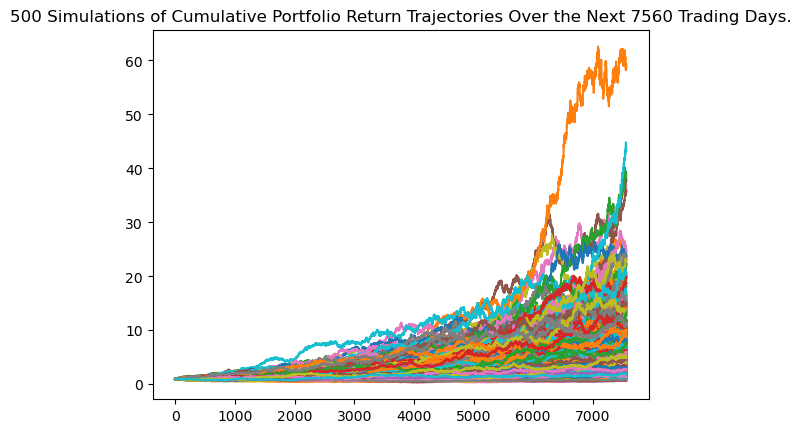

In [195]:
# Plot simulation outcomes
line_plot = MC_30_years_dist.plot_simulation()

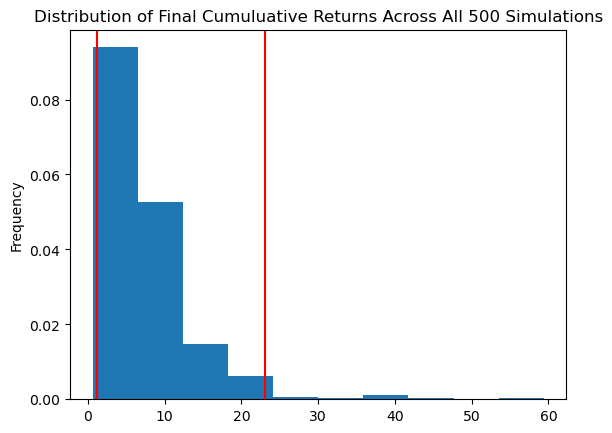

In [196]:
# Plot probability distribution and confidence intervals
line_plot = MC_30_years_dist.plot_distribution()

### Retirement Analysis

In [197]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_statistics = MC_30_years_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_statistics)

count           500.000000
mean              7.359797
std               6.194289
min               0.631399
25%               3.373327
50%               5.575406
75%               9.215750
max              59.383203
95% CI Lower      1.227265
95% CI Upper     23.022121
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [198]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_upper = round(MC_summary_statistics[8]*20000,2)
even_ci_lower = round(MC_summary_statistics[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $460442.42 and $24545.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [199]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_upper = round(MC_summary_statistics[8]*15000,2)
even_ci_lower = round(MC_summary_statistics[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $345331.81 and $18408.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [200]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5)

In [201]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989616,1.003967,1.006330,0.999443,0.990264,1.009448,1.009331,1.003114,0.993532,1.001968,...,1.001657,1.012556,0.998075,1.006327,0.997761,1.005674,1.002260,1.001710,0.985972,1.008430
2,0.988565,1.018407,1.013645,0.993247,0.978865,1.014882,1.011674,0.996290,1.000456,0.994411,...,1.010607,1.021265,1.013401,1.014759,1.022492,0.987429,0.996647,0.989104,0.994751,1.007097
3,0.996055,1.034102,1.021782,0.985225,0.963525,1.006632,1.028560,0.985430,1.009437,1.008993,...,1.028750,1.002625,1.027613,1.030155,1.039033,1.001583,1.009978,0.994460,0.998903,1.009119
4,0.992452,1.032945,1.023938,0.991890,0.966564,1.001735,1.047845,0.999050,1.009773,1.001271,...,1.026042,1.000109,1.028193,1.035531,1.034898,0.994834,1.017267,1.002842,1.014097,1.008488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.330634,1.075782,2.053051,1.138488,1.147243,2.670296,1.707181,1.973993,2.476168,1.159453,...,0.733654,1.569583,1.774273,1.621739,2.384840,2.085508,2.556802,1.719352,1.640422,1.485912
1257,2.326818,1.089579,2.064150,1.149825,1.148488,2.670728,1.737353,1.975414,2.511209,1.155219,...,0.745403,1.589814,1.777362,1.602203,2.431345,2.114151,2.580554,1.728862,1.636853,1.477482
1258,2.389546,1.101357,2.079010,1.141944,1.147009,2.653619,1.751523,1.972222,2.505435,1.157908,...,0.750267,1.594989,1.757557,1.605660,2.432027,2.146482,2.526758,1.744117,1.649239,1.487841
1259,2.409229,1.099416,2.078469,1.135471,1.146920,2.657320,1.755067,1.958604,2.460416,1.163230,...,0.749045,1.608165,1.769117,1.595512,2.391554,2.156696,2.538746,1.729475,1.633986,1.476904


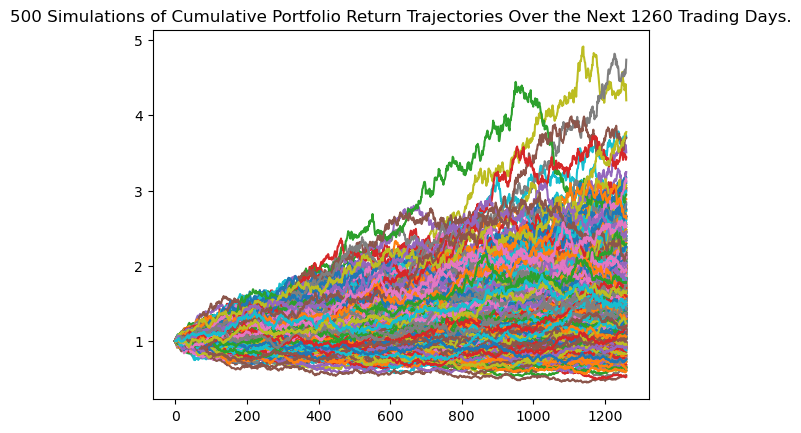

In [202]:
# Plot simulation outcomes
line_plot = MC_5_years_dist.plot_simulation()

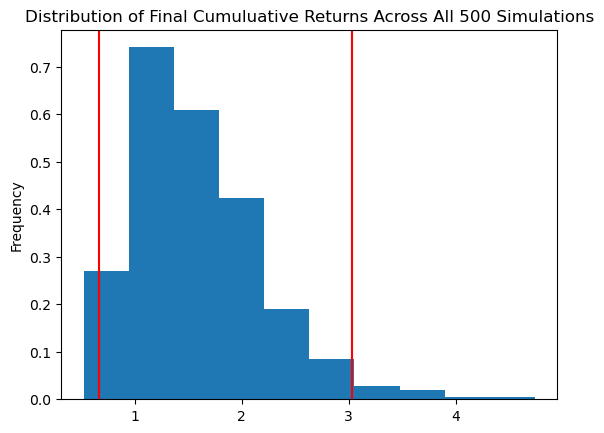

In [203]:
# Plot probability distribution and confidence intervals
line_plot = MC_5_years_dist.plot_distribution()

In [204]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_statistics_5 = MC_5_years_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_statistics_5)

count           500.000000
mean              1.588075
std               0.610299
min               0.525573
25%               1.142807
50%               1.491861
75%               1.939661
max               4.738890
95% CI Lower      0.669529
95% CI Upper      3.033689
Name: 1260, dtype: float64


In [205]:
# Set initial investment
initial_investment = 1000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_upper_five = round(MC_summary_statistics[8]*1000,2)
even_ci_lower_five = round(MC_summary_statistics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower_five} and ${even_ci_upper_five}")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next 5 years will end within in the range of $23022.12 and $1227.27


### Ten Years Retirement Option

In [206]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

In [207]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004900,1.001439,0.980151,1.000503,1.003184,1.002446,1.013487,0.986281,1.014350,0.996641,...,0.982575,0.994148,1.014871,1.014306,0.997947,1.001587,1.019748,1.008696,0.995563,0.997740
2,1.018320,0.990599,0.973411,1.006476,1.000249,1.002516,1.010038,0.987135,1.007975,1.002817,...,0.986705,0.978363,1.004670,1.013464,1.006754,1.005629,1.021330,1.009170,1.005765,0.985310
3,1.019055,1.000480,0.968677,1.002727,0.979391,1.018387,0.995290,0.973648,1.012882,1.019734,...,0.990338,0.980260,1.006904,0.996406,1.015402,1.009121,1.028794,1.015119,1.006834,0.981867
4,1.006795,1.007194,0.959235,1.012585,0.980885,1.035750,0.989028,0.979644,0.998511,1.034275,...,0.986418,0.966362,1.006032,0.989701,1.008447,1.005212,1.035601,1.002250,0.993824,0.997082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.505641,2.667244,5.436218,2.353581,2.397110,1.652496,2.140212,1.590377,0.800077,4.628896,...,2.079825,1.362986,0.471259,2.225380,1.840061,1.582524,1.838126,1.933272,4.786706,1.906671
2517,1.472757,2.625320,5.391597,2.374626,2.419024,1.650594,2.094512,1.596572,0.807592,4.575538,...,2.059675,1.345705,0.467132,2.234583,1.831550,1.556247,1.828025,1.886129,4.791163,1.912576
2518,1.477113,2.624241,5.318420,2.355018,2.427864,1.659584,2.078876,1.592755,0.822950,4.591416,...,2.064398,1.384079,0.474615,2.214769,1.825351,1.596049,1.818635,1.894932,4.820049,1.898472
2519,1.497829,2.639772,5.249539,2.369084,2.441037,1.666171,2.095152,1.597711,0.812751,4.542200,...,2.028302,1.382602,0.481516,2.217968,1.803379,1.587284,1.831682,1.909425,4.897719,1.898004


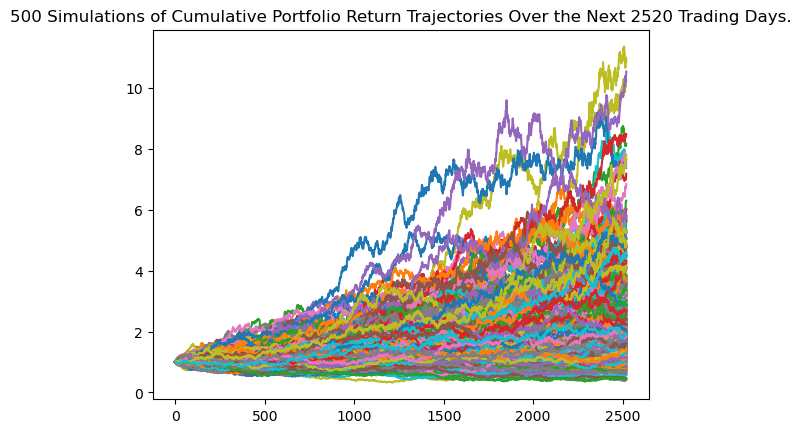

In [208]:
# Plot simulation outcomes
line_plot = MC_10_years_dist.plot_simulation()

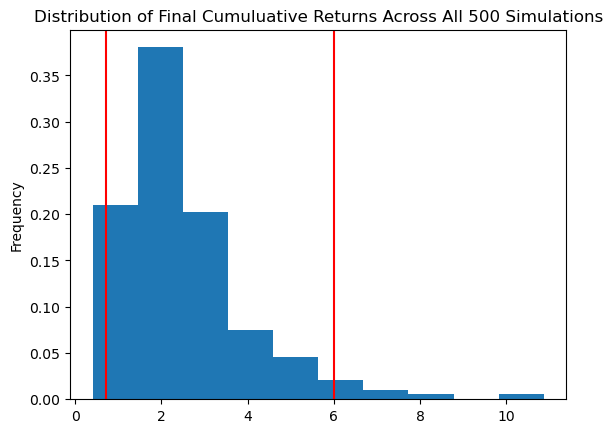

In [209]:
# Plot probability distribution and confidence intervals
line_plot = MC_10_years_dist.plot_distribution()

In [210]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_statistics_10 = MC_10_years_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_statistics_10)

count           500.000000
mean              2.494823
std               1.490930
min               0.407990
25%               1.547730
50%               2.122102
75%               3.034314
max              10.871798
95% CI Lower      0.710363
95% CI Upper      6.008322
Name: 2520, dtype: float64


In [211]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_upper_ten = round(MC_summary_statistics[8]*1000,2)
even_ci_lower_ten = round(MC_summary_statistics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower_ten} and ${even_ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $23022.12 and $1227.27
